# Class Imbalance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='survived', ylabel='count'>

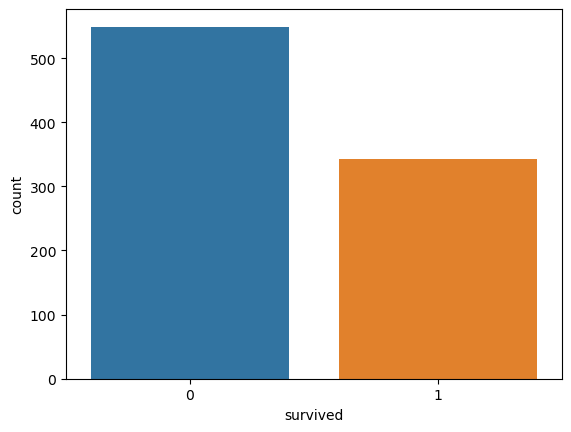

In [4]:
sns.countplot(x = df['survived'])

# Observations:
- Number of Non - survived is higher than the number of survived.
- When the target is having highly different number of categories or classes, we say that the data is suffering from class imbalance problem.

In [5]:
df2 = sns.load_dataset("iris")
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='species', ylabel='count'>

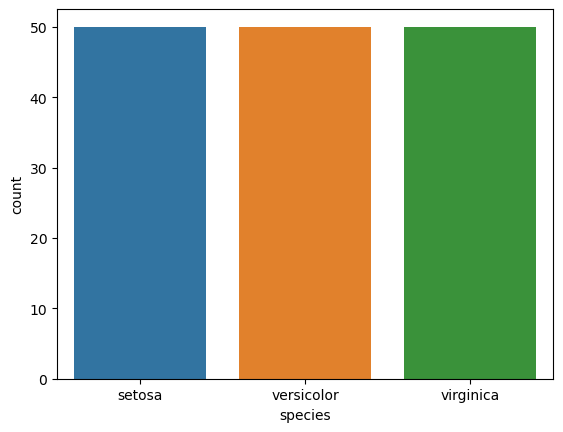

In [6]:
sns.countplot(x = df2["species"])

# Observations:

- We have equal number of iris flower species i.e. 50 setosa, 50 versicolor, 50 virginica
- We have a balanced class or balanced target.

# Load the data

In [7]:
data = pd.read_csv("marketing_campaign.csv")
data.head()

,id,target,day,month,duration,contactId,age,gender,job,maritalStatus,education,creditFailure,accountBalance,house,credit,contactType,numberOfContacts,daySinceLastCampaign,numberOfContactsLastCampaign,lastCampaignResult
0,432148809,no,27,may,166,623,30,female,worker,married,highSchool,no,-202,no,no,unknown,2,NaN,0,unknown
1,432184318,no,26,oct,183,1992,42,female,manager,married,uniGraduated,no,2463,no,no,cellPhone,2,NaN,0,unknown
2,432182482,no,5,jun,227,2778,26,female,services,single,highSchool,no,2158,yes,yes,landline,1,NaN,0,unknown
3,432150520,no,2,jun,31,3070,34,male,unemployed,divorced,uniGraduated,yes,75,yes,no,unknown,3,NaN,0,unknown
4,432145870,no,15,may,1231,6583,48,male,worker,married,secondarySchool,no,559,yes,no,unknown,2,NaN,0,unknown


<Axes: xlabel='target', ylabel='count'>

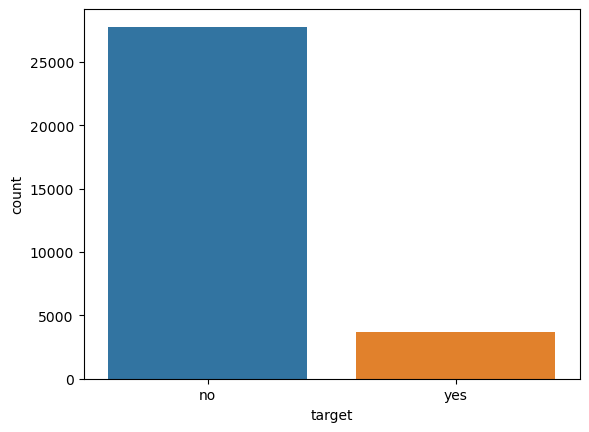

In [8]:
sns.countplot(x = data["target"])

# Observations:

- Customers who did not subscribe for the campaign is 5 times than the people who subscribed.
- Clearly, this is a class imbalance.

# Why Class imbalance problem is a problem?

In [9]:
data.shape

(31480, 20)

In [10]:
31480 * 0.15

4722.0

In [11]:
data["target"].value_counts()

target
no     27780
yes     3700
Name: count, dtype: int64

# Dataset where class imbalance can be seen

1. Medical dataset. (Cancer dataset - 50000, 48000 - No, 2000 - Yes)
2. Fraud Detection. (Fraud dataset - 75000, 74500 - No, 500 - Yes)
3. Spam dataset.

# Techniques to deal with Class Imbalance problem:

1. Oversampling the minority class
2. Undersampling the majority class
3. SMOTE(Synthetic Minority Over Sampling Technique)

In [12]:
data = pd.read_csv("creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
data.shape

(284807, 31)

<Axes: xlabel='Class', ylabel='count'>

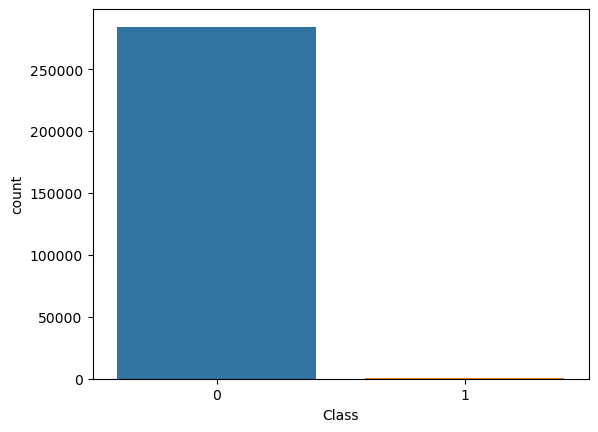

In [14]:
sns.countplot(x = data['Class'])

In [15]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [16]:
# Seperate X and y
X = data.drop("Class", axis = 1)
y = data["Class"]

In [17]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)   

In [18]:
# apply Logistic Regression on the train set

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [19]:
lr.fit(X_train, y_train)

LogisticRegression()

In [20]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.998735999438222

# Observations:
- We see that the accuracy of the model is 99.17% which is misleading
- We also know that this high accuracy is because of class imbalance problem

# Method 1: OverSampling the minority class

- Making both class same by increasing the number of the minority class

In [22]:
df_minority = data[data['Class'] == 1]
df_minority.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [23]:
df_majority = data[data['Class'] == 0]
df_majority.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [24]:
from sklearn.utils import resample
df_minority_oversampled = resample(df_minority, n_samples = 284315, replace = True, random_state = 0)
df_minority_oversampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
68633,53076.0,1.296231,0.417447,0.193963,0.901644,0.130531,-0.371634,0.158126,-0.202669,-0.079512,...,-0.112114,-0.220002,-0.121022,-0.440454,0.671540,-0.413518,0.032838,0.020600,1.18,1
10897,18690.0,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-7.175097,...,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,1.00,1
42674,41194.0,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,...,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1.52,1
79536,58067.0,-0.264869,3.386140,-3.454997,4.367629,3.336060,-2.053918,0.256890,-2.957235,-2.855797,...,-1.394504,-0.166029,-1.452081,-0.251815,1.243461,0.452787,0.132218,0.424599,1.00,1
151462,95559.0,-16.308650,11.614801,-19.739386,10.463866,-12.599146,-1.202393,-23.380508,-5.781133,-7.811022,...,-4.884983,1.140910,1.392953,0.348997,-2.167510,-0.798754,-2.942775,-0.462680,1.63,1


In [25]:
df_minority_oversampled.shape

(284315, 31)

In [26]:
df_majority.shape

(284315, 31)

In [27]:
# combine the both the classes

In [28]:
data = pd.concat([df_minority_oversampled, df_majority])
data.shape

(568630, 31)

<Axes: xlabel='Class', ylabel='count'>

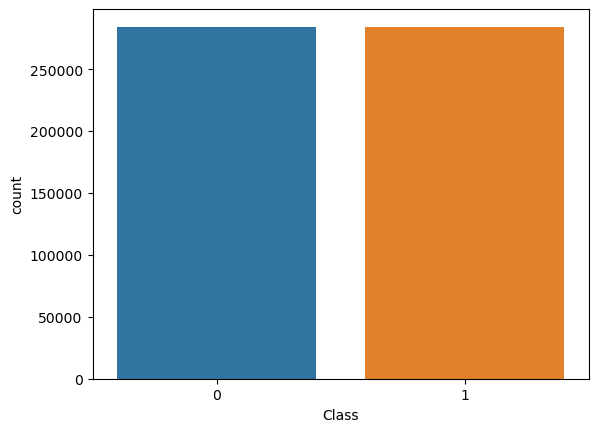

In [29]:
sns.countplot(x = data["Class"])

In [30]:
# Seperate X and y

X = data.drop("Class", axis = 1)
y = data["Class"]

In [31]:
# Split the data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
lr.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [34]:
accuracy_score(y_test, y_pred)

0.9448850746531137

# Method 2 : UnderSampling the majority class
- The idea reduce the number of rows from the majority class to minority one.

In [35]:
from sklearn.utils import resample
df_majority_undersampled = resample(df_majority, n_samples = 492, replace = True, random_state = 0)
df_majority_undersampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
118196,74987.0,1.527433,-0.461260,-0.834114,-1.028904,0.089216,-0.175688,-0.274290,-0.076280,-0.786820,...,0.097526,0.199935,-0.274765,-1.322760,0.851065,0.038527,-0.023607,-0.021650,1.00,0
152645,97429.0,1.936028,-0.391544,0.455258,0.673310,-1.217873,-0.703623,-0.940000,-0.103963,2.595080,...,-0.082077,0.169631,0.375442,0.434502,-0.669984,0.413046,-0.037385,-0.038219,14.95,0
122829,76703.0,1.212061,-0.366070,1.059187,-0.035950,-1.002583,0.047175,-0.811711,0.213515,0.856225,...,-0.092749,-0.091206,0.014558,0.091391,0.128617,0.993584,-0.036948,0.001613,1.00,0
86498,61260.0,-1.051204,1.075649,0.895192,1.175461,0.109368,0.474795,0.128613,0.676522,-0.574833,...,0.030416,0.305363,0.039111,-0.296289,-0.028537,-0.221573,0.198834,0.099191,19.09,0
211937,138636.0,-4.478412,-4.322205,-1.503282,-1.876924,-2.148060,-0.946421,1.117545,0.099251,0.136878,...,-0.624943,-1.553608,-0.626894,0.158920,-1.009544,-0.862611,0.217553,-0.464175,602.69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266028,162159.0,-0.221067,1.089640,-0.106928,-0.670359,1.268419,-0.690227,1.291926,-0.376989,-0.015878,...,-0.306627,-0.563795,0.044282,0.518859,-0.878654,0.028430,0.113800,0.069950,9.99,0
61465,49852.0,-1.120449,-0.123016,3.185254,0.656212,-0.421342,0.467693,-0.478847,0.469427,0.858223,...,-0.062195,0.139063,-0.124220,0.471052,0.217513,0.428871,0.081877,0.083648,20.61,0
10871,18620.0,1.127882,0.466285,0.964348,2.558326,0.006212,0.504593,-0.369613,0.062731,0.821763,...,-0.001994,0.247079,-0.095783,-0.479615,0.409271,0.116883,0.000758,0.018235,20.85,0
117752,74795.0,-1.777247,1.662617,-1.260729,0.309004,1.725434,4.207988,-1.803035,-0.814756,-0.923966,...,-1.287880,0.206308,0.002717,1.004824,0.082101,-0.263010,0.051809,0.041148,20.18,0


In [36]:
df_majority_undersampled.shape

(492, 31)

In [37]:
df_minority.shape

(492, 31)

In [38]:
data = pd.concat([df_majority_undersampled, df_minority])
data.shape

(984, 31)

<Axes: xlabel='Class', ylabel='count'>

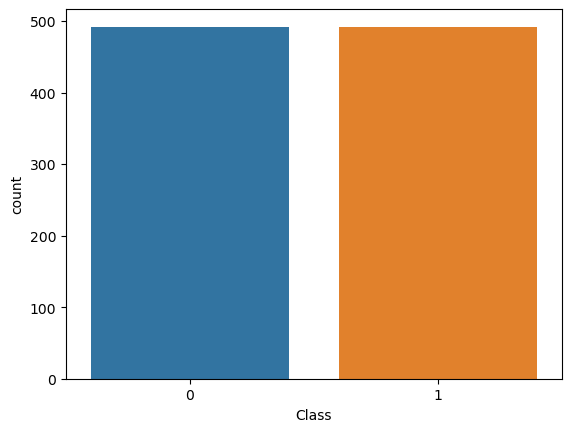

In [39]:
sns.countplot(x = data["Class"])

In [40]:
# Seperate X and y

X = data.drop("Class", axis = 1)
y = data["Class"]

In [41]:
# Split the data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [42]:
lr.fit(X_train, y_train)

LogisticRegression()

In [43]:
y_pred = lr.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1],
      dtype=int64)

In [44]:
accuracy_score(y_test, y_pred)

0.934010152284264

# Alternative Way for OverSampling and UnderSampling

In [45]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
rus

RandomUnderSampler()

In [46]:
X_rus, y_rus = rus.fit_resample(X, y)

In [47]:
X_rus.shape

(984, 30)

In [48]:
y_rus.shape

(984,)

# Method 3 : SMOTE
- SMOTE - Synthetic Minority OverSampling Technique
- It OverSamples the Minority class.

#### When we have Random OverSampling technique then why do we need another OverSampling technique in form of SMOTE?
- Applying Random OverSampling increases the chances of overfitting.
- To avoid overfitting issues, we have to shift towards techniques like SMOTE. 

In [49]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
smote

SMOTE()

In [56]:
data = pd.read_csv("creditcard.csv")

In [57]:
X = data.drop("Class", axis = 1)
y = data["Class"]

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [59]:
X_train_res, y_train_res = smote.fit_resample(X_train, y_train.ravel())

In [60]:
X_train_res.shape

(454916, 30)

In [61]:
y_train_res.shape

(454916,)

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr

LogisticRegression()

In [63]:
lr.fit(X_train_res, y_train_res)

LogisticRegression()

In [64]:
y_pred = lr.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
accuracy_score(y_test, y_pred)

0.9723324321477477

# Working of SMOTE:
- It oversamples the minority class by creating synthetic minority class samples.
- Steps of SMOTE:
- 1. Take the difference between a samples and its nearest neighbor.
  2. Multiply the difference by a random number between 0 to 1.
  3. Add this difference to the samples to generate a new sythetic examples in the feature space.
  4. Continue on with this, increasing the samples of minority class up to the user defined number.
 
- SMOTE is a statistical technique to increase the number of cases in the dataset in balanced way.
- It is also one of the most commongly used oversampling methods for class imbalance problems.

### If Random OverSampling can cause overfitting issues, it is also possible that Random UnderSampling can also lead to overfitting issues.
- To avoid this, Undersampling can also be performed in a systematic way using NearMiss Algorithm

# Near Miss Algorithm:

- It undersamples the majority class.
- It is a two step algorithm
- 1. For each minority sample, keep their m - nearest - neighbors.
  2. Select the majority samples for which the average distance is equal to the k nearest neighbors is the largest.

### Three Step Near Miss Algorithm:
1. The distance between the points of the majority class(m) and the points of the minority class(n) is considered.
2. The points of the majority class are selected. While selecting, care should be taken that only those who have the shortest distance are chosen.
3. The algorithm return m*n rows from the larger class.

In [66]:
from imblearn.under_sampling import NearMiss
nm = NearMiss()
nm

NearMiss()

In [68]:
data = pd.read_csv("creditcard.csv")

In [69]:
X = data.drop("Class", axis = 1)
y = data["Class"]

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [71]:
X_train_us, y_train_us = nm.fit_resample(X_train, y_train)

In [73]:
X_train_us.shape

(788, 30)

In [76]:
y_train_us.shape

(788,)

In [77]:
lr.fit(X_train_us, y_train_us)

LogisticRegression()

In [78]:
y_pred = lr.predict(X_test)

In [79]:
accuracy_score(y_test, y_pred)

0.7906674625188722